# Assignment #4

READ ALL INSTRUCTIONS CAREFULLY

This assignment is a puzzle. You have been given a data set with some semi-informative column headers but no additional information about it. Your goal is to investigate the data, understand as much about it as you can, and report back what you find.

You are free to use any and all of the techniques we have covered this semester: EDA, data wrangling, visualization (scatter plots, line plots, histograms, jointplots, etc.), descriptive statistics (mean, median, variance, covariance, etc.), regression / model fitting, loss functions (MSE, MAE), R^2, cross-validation, bootstrapping, gradient descent, etc... 

There are many different ways to approach this assignment and be successful. I recommend starting simple and getting slowly more sophisticated as needed.

## Collaborators

You must work in groups of 2-3. You cannot work on this assignment alone. Your partners cannot be anyone you have partnered with previously on an assignment and they cannot be in your group for the semester project.

**Names of all collaborators go here** (including yourself):

## Tools

You are not allowed to use LLMs (including the LLM results that pop up in Google search). You may use search online for ideas, use StackExchange, and I highly encourage using Python library documentation.

Hint: It may be useful to use the sklearn library for model fitting (and not to implement model fitting or optimization by hand).

## Submission Instructions

You must submit two files. One is your **Jupyter notebook** that you use to explore and analyze the data. The second file is a separate **PDF** reporting, presenting, and explaining your results with no code in it.

**Only one person** in your group should submit the assignment files on Canvas. Be sure everyone's names are listed under collaborators in both the notebook and the PDF so everyone gets credit!

## Potentially Helpful Documentation


https://scikit-learn.org/stable/api/sklearn.model_selection.html

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/api/sklearn.metrics.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

# Your Code Below

## Imports and CoW

In [175]:
# Add all of your import statements here. ONLY include the imports you actually use. There are useful tools in the scikit-learn library for regression and model fitting, but you are not required to use it. If you use it, you will need to install it into your virtual environment.

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# from sklearn.<something> import <something>

In [2]:
# Enforce Copy-on-Write (CoW) semantics
pd.set_option('mode.copy_on_write', True)

## Project Folder Organization and File Reading

You must read in the given data file using relative paths, as shown in previous assignments. Organize your work to be in a project folder, with src and data subfolders. Place your solution notebook in the src folder, and the given data file in the data folder.

In [182]:
# Read in the data file (using relative paths for reproducibility). It should be able to download your notebook, put it in the src folder of my project folder, and run it without changing anything.
cwd = Path().cwd()
path = cwd / 'data' / 'mystery-1.csv'
data_df = pd.read_csv(path, sep='|')
print(data_df.head())

           x           y          z         d1         d2         d3  \
0  45.257043  109.764179  38.057596 -59.072649 -14.805744  37.863842   
1  45.146703  109.814680  40.922755 -57.052267 -15.018721  37.872534   
2  47.732288  109.733472  39.181964 -42.744882  -9.708060  37.671144   
3  46.393936  109.376867  37.073853 -51.804489 -12.540430  37.774738   
4  52.908700  109.607200  37.583851 -12.337559   2.932994  37.291647   

             d4     c  
0  94095.637152  11.0  
1  93969.141494   3.0  
2  93724.024307  11.0  
3  93377.854892  10.0  
4  93101.403795   0.0  


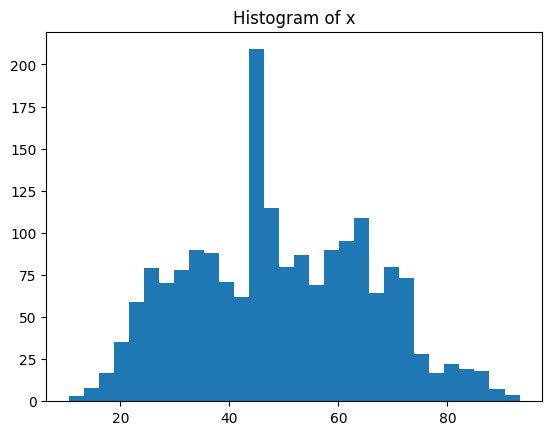

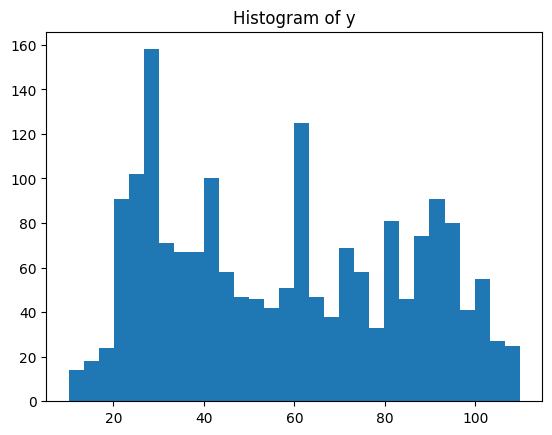

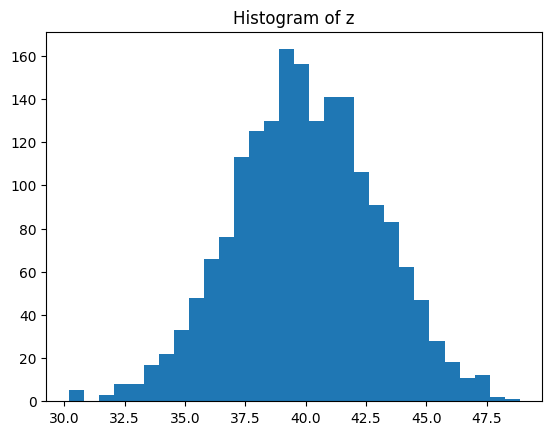

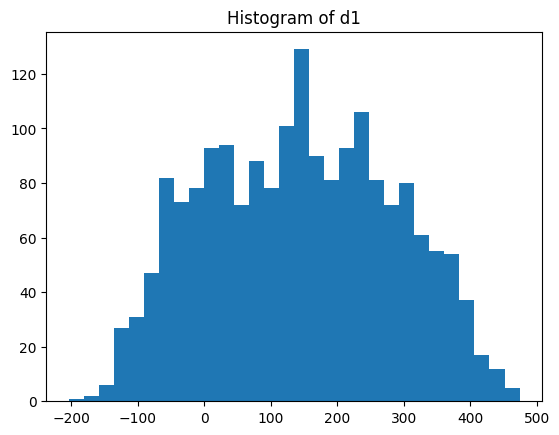

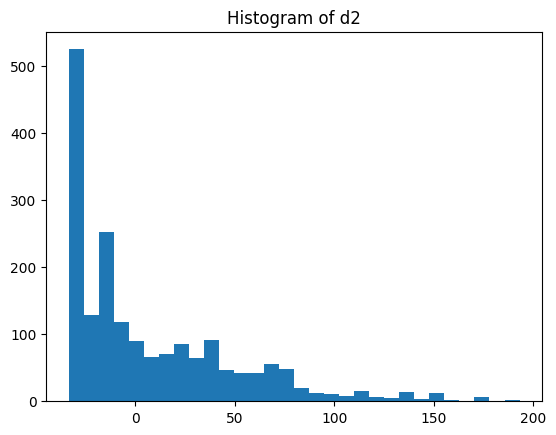

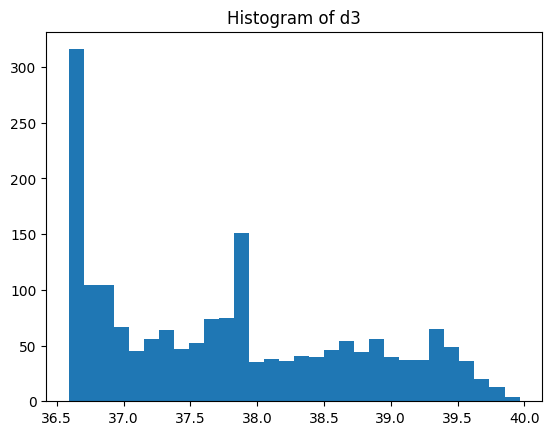

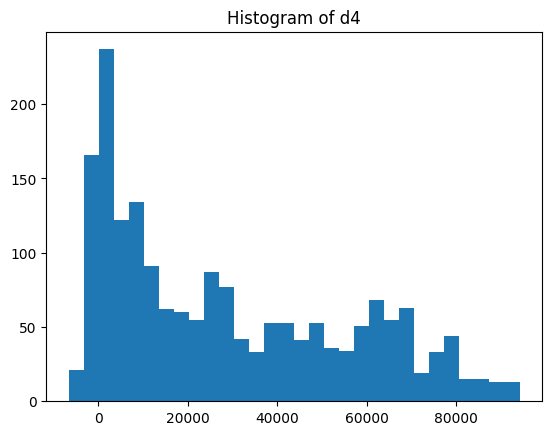

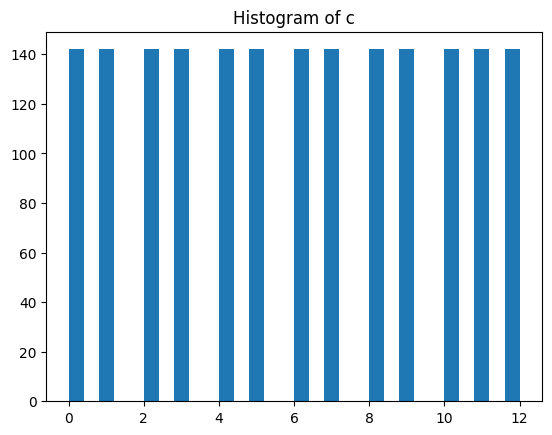

[11.  3. 10.  0. 12.  4.  1.  7.  5.  2.  9.  6.  8.]


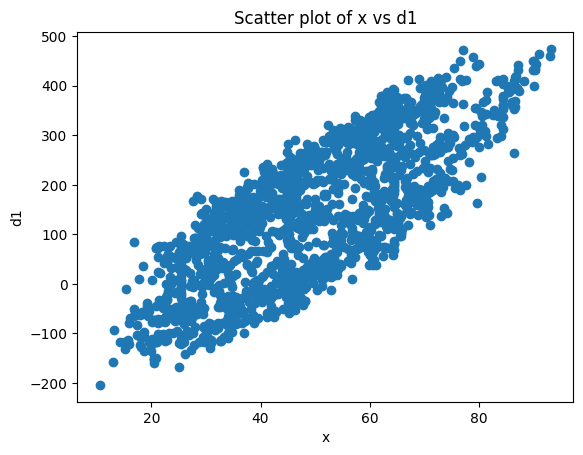

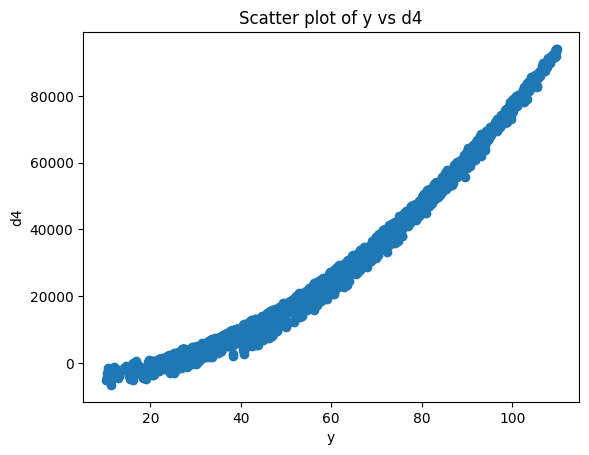

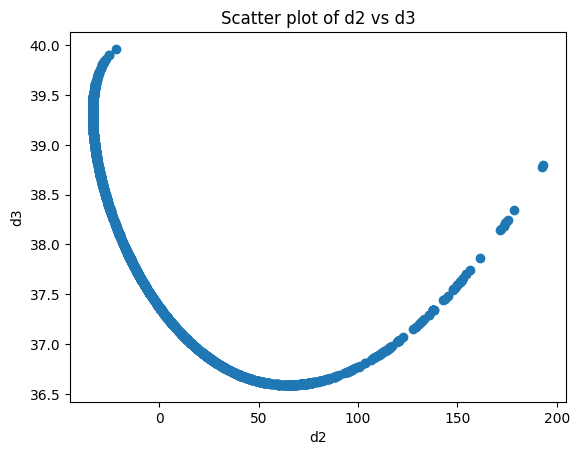

/Users/oscardehamer/dev/cs557-assignments/assignment4/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-142.5744522])

In [183]:
data_df = data_df[data_df['x'] != -999.0]

plt.hist(data_df['x'], bins=30, label='x')
plt.title('Histogram of x')
plt.show()

plt.hist(data_df['y'], bins=30, label='y')
plt.title('Histogram of y')
plt.show()

plt.hist(data_df['z'], bins=30, label='z')
plt.title('Histogram of z')
plt.show()

plt.hist(data_df['d1'], bins=30, label='d1')
plt.title('Histogram of d1')
plt.show()

plt.hist(data_df['d2'], bins=30, label='d2')
plt.title('Histogram of d2')
plt.show()

plt.hist(data_df['d3'], bins=30, label='d3')
plt.title('Histogram of d3')
plt.show()

plt.hist(data_df['d4'], bins=30, label='d4')
plt.title('Histogram of d4')
plt.show()

plt.hist(data_df['c'], bins=30, label='c')
plt.title('Histogram of c')
plt.show()

print(data_df['c'].unique()) # c only has values 11.  3. 10.  0. 12.  4.  1.  7.  5.  2.  9.  6.  8.

plt.scatter(data_df['x'], data_df['d1']) # shows some correlation
plt.title('Scatter plot of x vs d1')
plt.xlabel('x')
plt.ylabel('d1')
plt.show()



plt.scatter(data_df['y'], data_df['d4']) # shows some correlation
plt.title('Scatter plot of y vs d4')
plt.xlabel('y')
plt.ylabel('d4')
plt.show()

plt.scatter(data_df['d2'], data_df['d3']) # shows some correlation
plt.title('Scatter plot of d2 vs d3')
plt.xlabel('d2')
plt.ylabel('d3')
plt.show()

reg = LinearRegression().fit(data_df[['x']], data_df['d1'])
reg.predict([[5.0]])

In [184]:
correlation_xd1 = data_df['x'].corr(data_df['d1'])
print(f'Correlation between x and d1: {correlation_xd1}')

correlation_yd4 = data_df['y'].corr(data_df['d4'])
print(f'Correlation between y and d4: {correlation_yd4}')

correlation_d2d3 = data_df['d2'].corr(data_df['d3'])
print(f'Correlation between d2 and d3: {correlation_d2d3}')

var = data_df['c'].var()
print(f'Variance of d2: {var}')

Correlation between x and d1: 0.7642297628673732
Correlation between y and d4: 0.9811735033551071
Correlation between d2 and d3: -0.7260937557087218
Variance of d2: 14.00758807588076


Accuracy: 0.43783783783783786


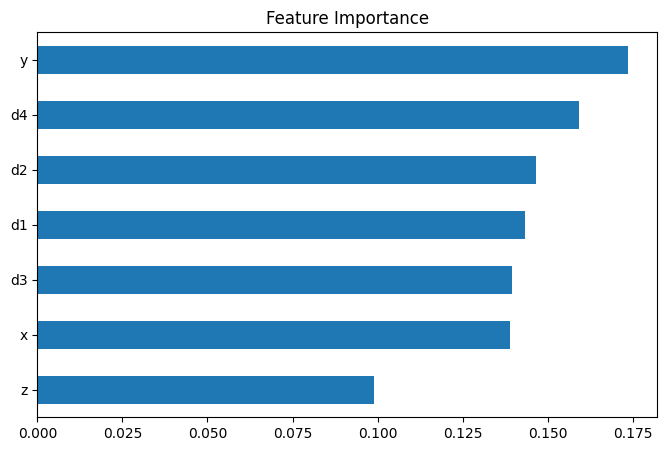

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data_df.drop(columns=['c'])
y = data_df['c'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test size default is .2 but .1 is better

model = RandomForestClassifier(n_estimators=200, random_state=42) #n_estimators = 200 is default, but 91 gave us 45% accuracy
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importances.plot(kind='barh', figsize=(8,5), title="Feature Importance")
plt.show()

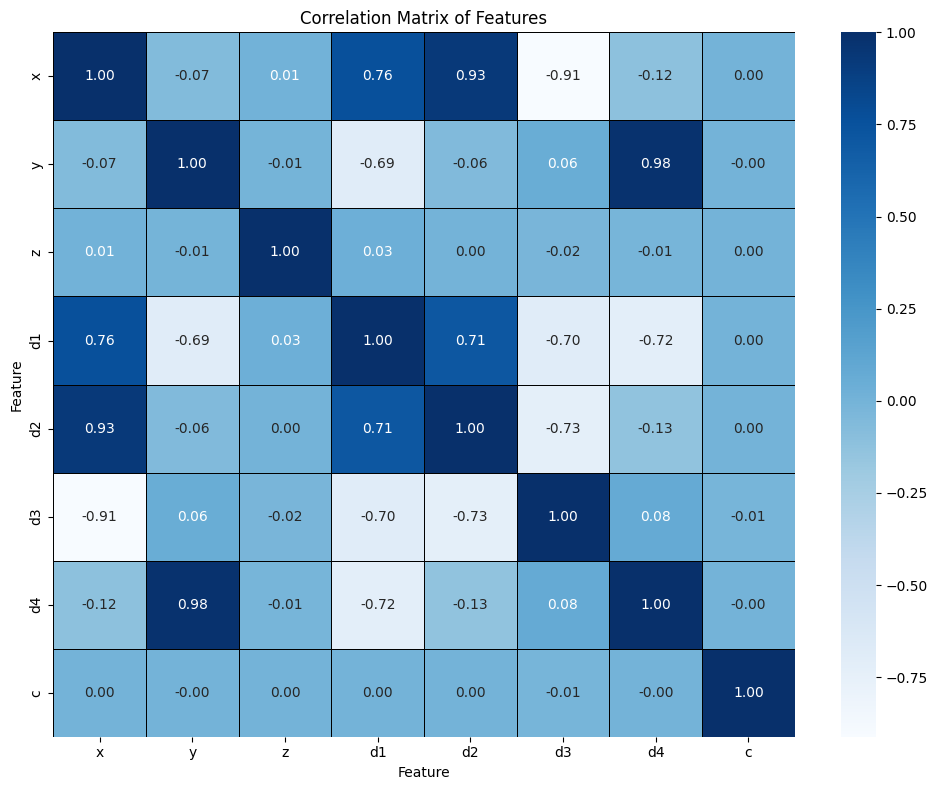

Top correlations:
 y   d4    0.981174
d4  y     0.981174
x   d2    0.932531
d2  x     0.932531
x   d3    0.911707
d3  x     0.911707
x   d1    0.764230
d1  x     0.764230
d2  d3    0.726094
d3  d2    0.726094
dtype: float64


In [186]:
# pearson correlation
correlation_matrix = data_df.corr()

# plot feature correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', linewidth=0.5, linecolor="black")
plt.title("Correlation Matrix of Features")
plt.xlabel("Feature")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

# print top 10 strongest correlations
correlation_pairs = (correlation_matrix.where(~np.eye(len(correlation_matrix), dtype=bool))
                     .abs()
                     .stack()
                     .sort_values(ascending=False))

print("Top correlations:\n", correlation_pairs.head(10))

What the correlation matrix shows is that there are strong dependencies between the d1, d2, d3, d4 features. This tells us they are likely aquired from the same measuring process, rather then representing independent quantities. Some examples:
- d1 and d2 both have strong positive linear relationships with x.
- d3 and x have a strong negative linear relationship
- x, y, and z have no relationship, which is expected as we are assuming these are axes
- as we can see, c has no relationships with other featurres, supporting the random forest classifier which got an accuracy percentage of roughly 44%
What we can gather from this is that linear models will probably not perform well, and we should consider redundant features.

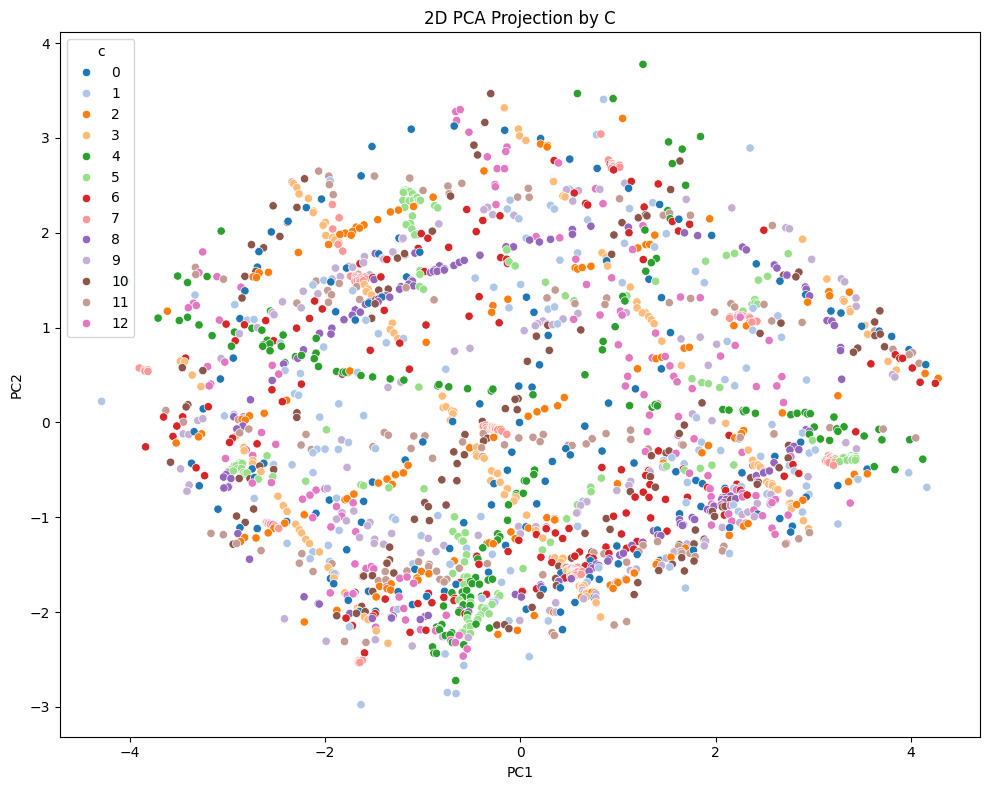

Explained variance from PC1 and PC2: [0.52334442 0.29020231]
Sum of Variance Retained 0.8135467354902048


In [187]:
# visually seperable? (linear)

# drop column c, keep other features, y has column names
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler


feautures = data_df.drop(columns=['c'])

# make sure nothing is distorted
scaler = StandardScaler()
features_scaled = scaler.fit_transform(feautures)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(features_scaled)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab20')

plt.title("2D PCA Projection by C")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="c", loc="upper left")

plt.tight_layout()
plt.show()

print("Explained variance from PC1 and PC2:", pca.explained_variance_ratio_)
print("Sum of Variance Retained", pca.explained_variance_ratio_.sum())

We can see there is a lot of overlap between classes, with none forming any distinctive clusters or groups.
This all supports earlier findings, no features are strongly correlated to C, and the 44 percent accuracy from the Random Forest classifier.
- C is predictable but depends on non-linear combinations of multiple features
PC1 accounts for 52 percent of variability
PC2 accounnts for 29 percent of variability
Holding a total variance retained of roughly 81% is good, and indicates that the 2D PCA plot has a strong aproximation of the original feature space.
We see that even when retaining most of the dataset's structure, there is still no clear visual separability, reinforcing the notion that C depends on non-linear combinations of features.

In [191]:
data_df.info()
data_df.describe(include='all').T
(data_df == -999.0).sum()         # sentinel counts
data_df.duplicated().sum()
# Simple outlier detection (IQR)
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_df < (Q1 - 1.5*IQR)) | (data_df > (Q3 + 1.5*IQR))).sum()
print(outliers)

<class 'pandas.core.frame.DataFrame'>
Index: 1846 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1846 non-null   float64
 1   y       1846 non-null   float64
 2   z       1846 non-null   float64
 3   d1      1846 non-null   float64
 4   d2      1846 non-null   float64
 5   d3      1846 non-null   float64
 6   d4      1846 non-null   float64
 7   c       1846 non-null   float64
dtypes: float64(8)
memory usage: 129.8 KB
x      0
y      0
z      9
d1     0
d2    48
d3     0
d4     0
c      0
dtype: int64


NameError: name 'pipe' is not defined